In [1]:
"""
본 코드는 'Prelim_feminism' and 'chosun_cleanning' 기반으로 재구성됨

chosun9099와 df_clean을 vlookup으로 merge함 

조선일보의 경우, 클리닝 완료된 상태를 머지함(완벽한 클리닝상태 아님)
빅카인즈는 명사화된 그대로 돌림

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykospacing import Spacing #얘는 두번돌리면 안됨 ㅅㅂ 이유가 뭐야
from konlpy.tag import Okt
from collections import Counter
from tqdm import tqdm

In [28]:
chosun9099 = pd.read_csv('C:/Users/Hyejin/Documents/Python Scripts/02_feminism/chosun9099.csv', encoding='utf-8')
df_clean= pd.read_csv('C:/Users/Hyejin/Documents/Python Scripts/02_feminism/df_clean.csv',encoding='utf-8')

In [29]:
# 변수이름 통일해줍시다
chosun9099.rename(columns = {'main_pos_f' : 'word' }, inplace = True) #변수이름 변경
chosun9099['platform'] = '조선일보' #단일값변수생성

In [30]:
"""
https://yganalyst.github.io/data_handling/Pd_12/
참조_데이터 merge

"""

# inner 옵션으로 두 데이터의 교집합만 뽑아냄
merge9099 = pd.concat([chosun9099,df_clean], axis = 0, join = 'inner')
merge9099 = merge9099.reset_index()
merge9099 = merge9099.drop(['index'], axis = 1)

In [ ]:
merge9099.head(10)

In [66]:
merge9099.tail(10) #조선일보랑 상태비교

,date,URL,word,platform,keyword
628,1996-09-11 00:00:00,NaN,캐럴 페이트먼 성의 계약 최신사상 흐름 현대판 가부장 사회 계약 비판 여성신체 추상...,한겨레,"[캐럴, 페이트먼, 성의, 계약, 최신사상, 흐름, 현대판, 가부장, 사회, 계약,..."
629,1996-09-04 00:00:00,NaN,데버러 카메론 페미니즘 언어이론 최신사상 흐름 언어 천착 여성 차별 원인 전제 공통...,한겨레,"[데버러, 카메론, 페미니즘, 언어이론, 최신사상, 흐름, 언어, 천착, 여성, 차..."
630,1996-03-17 00:00:00,NaN,반영 지역 현실 적극 여성연구 활기 접근 부산 대구 광주전남 생활 실태 접근 보고서...,한겨레,"[반영, 지역, 현실, 적극, 여성연구, 활기, 접근, 부산, 대구, 광주전남, 생..."
631,1996-01-09 00:00:00,NaN,여성 평등 세상 변혁 모태 해외석학 개도국 여성 빈곤 성차별 이중굴레 인신매매 피해...,한겨레,"[여성, 평등, 세상, 변혁, 모태, 해외석학, 개도국, 여성, 빈곤, 성차별, 이..."
632,1995-12-24 00:00:00,NaN,결산 여성 회의 맹활약 역량 결산 여성 회의 맹활약 역량 위안부 부각 성...,동아일보,"[결산, 여성, , , , 회의, 맹활약, 역량, 결산, 여성, , , , 회의, ..."
633,1995-01-07 00:00:00,NaN,미대륙 세계 시각 개인주의 약자 불만 견제 증오 선동 정치판 확산 기세 미국 라디오...,한겨레,"[미대륙, 세계, 시각, 개인주의, 약자, 불만, 견제, 증오, 선동, 정치판, 확..."
634,1994-12-20 00:00:00,NaN,종합병원 신은경 이정화 탤런트 화요일 사람 세대 전형 실제성격 소극적 내성적 스타 ...,한겨레,"[종합병원, 신은경, 이정화, 탤런트, 화요일, 사람, 세대, 전형, 실제성격, 소..."
635,1994-03-16 00:00:00,NaN,민족문학 성차별 민족 문학 비판 김양선 정순진씨 이인휘 정인택 송기원 겨냥 반여성 ...,한겨레,"[민족문학, 성차별, 민족, 문학, 비판, 김양선, 정순진씨, 이인휘, 정인택, 송..."
636,1994-02-06 00:00:00,NaN,서울방송 집중 여자 방송주평 슈퍼우먼 신데렐라 환상 추구 성차별구조 과대포장 외면 ...,한겨레,"[서울방송, 집중, 여자, 방송주평, 슈퍼우먼, 신데렐라, 환상, 추구, 성차별구조..."
637,1993-01-27 00:00:00,NaN,여성 이론 현실서규명 여성학대중교양 흐름 자리 신부 남성콤플렉스 불평등 출간 준비 ...,한겨레,"[여성, 이론, 현실서규명, 여성학대중교양, 흐름, 자리, 신부, 남성콤플렉스, 불..."


In [65]:
merge9099['word'] = merge9099['word'].str.lower()
merge9099['word'] = merge9099['word'].str.replace("[^A-Za-z-가-힣]", " ",  regex = True)
merge9099['word'] = merge9099['word'].str.replace("+", " ",  regex = True) # 다중공백제거

## word 변수를 keyword 변수화: 띄어쓰기 or ',' 기준으로 단어를 묶음

In [61]:
merge9099['keyword'] = merge9099['word'].apply(lambda x: str(x).split(' '))

# Basic ananlysis 시작

In [63]:
from gensim import corpora, models
import gensim #젠심 임포트 전에 안해서 꼭 하렴


# TOTAL documents yr from 90 to 10 (조선일부 부분적 포함)
merge9099_dic = corpora.Dictionary(merge9099['keyword'])
merge9099_corpus = [merge9099_dic.doc2bow(text) for text in merge9099['keyword']] #[]안 딕셔너리는 앞서 지정된 딕셔너리를 의미

print(merge9099_corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

[(3, 3), (5, 7), (18, 3), (20, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 2), (55, 1), (56, 1), (57, 4), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 2), (79, 1), (80, 1), (81, 6), (82, 1), (83, 1), (84, 4), (85, 1), (86, 2), (87, 2), (88, 1), (89, 2), (90, 1), (91, 6), (92, 3), (93, 5), (94, 1), (95, 1), (96, 1), (97, 3), (98, 1), (99, 1), (100, 3), (101, 2), (102, 2), (103, 1), (104, 1), (105, 3), (106, 2), (107, 1), (108, 1), (109, 1), (110, 1), (111, 1), (112, 1), (113, 2), (114, 10), (115, 1), (116, 1), (117, 5), (118, 9), (119, 1), (120, 1), (121, 1), (122, 2), (123, 1), (124, 1), (125, 1), (126, 1), (

# PPL score & coherence Score to select Topic N = k

In [71]:
'''
https://brunch.co.kr/@jiheon0105/38 
참조링크

'''


import gensim 
from gensim.models import CoherenceModel
Lda = gensim.models.ldamodel.LdaModel # 아래 for문 앞에 쓰임 c


# Total documents = merge 9099
merge9099_ppl = []
merge9099_cohere = []

## range from 2 to 25, 25 is not included
for i in range(2,25):
    merge9099_lda = Lda(merge9099_corpus, num_topics = i, id2word= merge9099_dic, passes = 100 , iterations = 300,  chunksize = 150, random_state = 0, alpha = 'auto')
    merge9099_ppl.append(merge9099_lda.log_perplexity(merge9099_corpus)) #혼잡도 아래 일관도
    merge9099_cohere.append(CoherenceModel(model = merge9099_lda, texts = merge9099['keyword'] , dictionary = merge9099_dic, coherence='c_v', topn = 10).get_coherence())
    print(i, 'the process complete')

2 the process complete
3 the process complete
4 the process complete
5 the process complete
6 the process complete
7 the process complete
8 the process complete
9 the process complete
10 the process complete
11 the process complete
12 the process complete
13 the process complete
14 the process complete
15 the process complete
16 the process complete
17 the process complete
18 the process complete
19 the process complete
20 the process complete
21 the process complete
22 the process complete
23 the process complete
24 the process complete


# Plots - merge9099 (partially chosun)

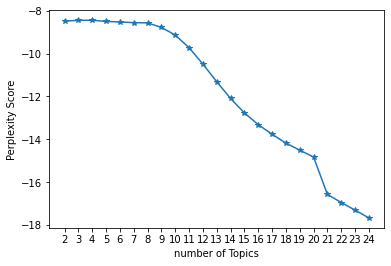

[-8.441550216653567,
 -8.496460583479953,
 -8.521128549441501,
 -8.553582072624277,
 -8.565165917663599,
 -8.775519981467056,
 -9.133914583982879,
 -9.722788719645699,
 -10.487964487337381,
 -11.31131169313175,
 -12.094444827122173,
 -12.768352063402512,
 -13.316313509591467,
 -13.763849853196158,
 -14.180196799061022,
 -14.507508556318998,
 -14.83006852555838,
 -16.57344875022283,
 -16.954326731697805,
 -17.31059409892904,
 -17.67277529766005]

In [72]:
import matplotlib.pyplot as plt

'''
https://github.com/2017100898/BlogTopic

참조할것

'''


# merge9099, 코드 안돌아가면 위에 숫자 인덱싱 몇번했는지 확인해서 맞춰서 쓰렴

x = range(2,25)
plt.plot(x, merge9099_ppl, marker = '*')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("number of Topics")
plt.ylabel("Perplexity Score")
plt.show()

merge9099_ppl[2:25] # min 22, cohere고려시.. 20

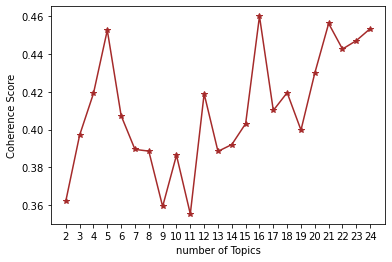

[0.41911101509402643,
 0.45261287201992195,
 0.4073551900141424,
 0.3894787721877619,
 0.38857110799005506,
 0.35924827466228243,
 0.386398420452882,
 0.35531418614362786,
 0.418945123348953,
 0.38844856510860465,
 0.3920528922402898,
 0.40314104517582455,
 0.4599993236170895,
 0.41012117918045526,
 0.4195196264811531,
 0.3997134423397174,
 0.4299428422554282,
 0.45617153054132953,
 0.4426269007888243,
 0.4470988126407901,
 0.45340812933377217]

In [73]:
x = range(2,25)
plt.plot(x, merge9099_cohere, color = 'brown', marker = '*')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("number of Topics")
plt.ylabel("Coherence Score")
plt.show()

merge9099_cohere[2:31] # max: 8, ppl고려시 20

# Topic Extraction

In [75]:
# 빈도상 너무 많이 나오는 남성, 여성을 삭제해야 하는가? 

merge9099_lda = Lda(merge9099_corpus, num_topics = 21, id2word= merge9099_dic, passes = 100 , iterations = 300,  chunksize = 150, random_state = 0, alpha = 'auto')
merge9099_topic = merge9099_lda.print_topics(num_topics = 21, num_words = 8)

for topic in merge9099_topic:
    print(topic)


(0, '0.085*"세대" + 0.017*"음식" + 0.012*"수정" + 0.012*"화장실" + 0.012*"보도" + 0.012*"기분" + 0.011*"이익" + 0.010*"프로그램"')
(1, '0.065*"게임" + 0.000*"" + 0.000*"메갈" + 0.000*"일러스트" + 0.000*"씨" + 0.000*"커뮤니티" + 0.000*"프리랜서" + 0.000*"메갈리아"')
(2, '0.024*"미술" + 0.016*"세기" + 0.016*"문명" + 0.014*"민족주의" + 0.012*"시대" + 0.011*"저항" + 0.011*"특정" + 0.010*"인간"')
(3, '0.023*"페이지" + 0.017*"보부아르" + 0.017*"철학" + 0.016*"반발" + 0.014*"신화" + 0.012*"일본군" + 0.010*"필자" + 0.009*"이론가"')
(4, '0.050*"여성학" + 0.023*"연구" + 0.017*"법대" + 0.014*"여대" + 0.011*"미즈" + 0.008*"사회학" + 0.007*"연구회" + 0.007*"회장"')
(5, '0.071*"후보" + 0.055*"선거" + 0.022*"법률" + 0.021*"식민지" + 0.018*"복지" + 0.016*"동참" + 0.015*"시민운동" + 0.011*"합법"')
(6, '0.000*"관광객들" + 0.000*"교육생" + 0.000*"고산" + 0.000*"공가" + 0.000*"관광" + 0.000*"가이드라" + 0.000*"금잔화" + 0.000*"구아바잎"')
(7, '0.064*"여자" + 0.037*"남자" + 0.024*"모델" + 0.020*"드라마" + 0.013*"회사" + 0.012*"광고" + 0.011*"살인" + 0.011*"강남역"')
(8, '0.084*"대통령" + 0.025*"검사" + 0.019*"신은경" + 0.014*"검찰" + 0.014*"은폐" + 0.013*"선생님" + 0.009*"장미" 

# visualization

In [76]:
'''
위키독스 그대로 돌리면 안됨, 아래 위키독스(https://wikidocs.net/30708) 코드

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

'''

import pyLDAvis
import pyLDAvis.gensim_models



In [78]:
'''
I was able to control the problem based on how many topics (num_topics) I used when creating the LDA model - gensim.models.ldamodel.LdaModel. \\\
If I set the number of topics to 10 or more the problem occurred; 9 or fewer and it did not. Maybe this is based on the corpus I used.

Object of type complex is not JSON serializable ldavis 로 구글에 검색했을때 찾은 답변
그래서 앞에 모델로 돌아가서 토픽 개수를 수정해봄; 13개 부터 에러 메시지 "TypeError: Object of type complex is not JSON serializable " 나옴


'''

pyLDAvis.enable_notebook()
vis_merge9099 = pyLDAvis.gensim_models.prepare(merge9099_lda, merge9099_corpus, merge9099_dic)
# mds='mmds', 다른 코드는 이 옵션 안넣어도 돌아가는데 왜 이건 꼭 넣어야 할까... 그리고 그래프 모양이 달라짐
#  sort_topics=False 넣으면 12개도 에러뜸 ㅅㅂ


C:\Users\Hyejin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [79]:
pyLDAvis.display(vis_merge9099)

# 데이터분리
## 분리 후, 불용어 제거: 조선일보 제외 한글자 단어 및 불용어 제거 필요

In [10]:
################################################
########## 조건별 검색 후 데이터 따로 ############
################################################

# 플랫폼별, 시기별 데이터 조회 
# conserv9010, liberal9010, conserv1121, liberal1121

conserv10 = merge9099[(merge9099['date']>='1990-01-01') & (merge9099['date']<='2010-12-31') & (merge9099['platform'] != '한겨레') & (merge9099['platform'] != '경향신문')]
liberal10 =  merge9099[(merge9099['date']>='1990-01-01') & (merge9099['date']<='2010-12-31') & (merge9099['platform'] != '조선일보') & (merge9099['platform'] != '중앙일보') & (merge9099['platform'] != '동아일보')]
conserv21 = merge9099[(merge9099['date']>='2011-01-01') & (merge9099['date']<='2021-12-31') & (merge9099['platform'] != '한겨레') & (merge9099['platform'] != '경향신문')]
liberal21 =  merge9099[(merge9099['date']>='2011-01-01') & (merge9099['date']<='2021-12-31') & (merge9099['platform'] != '조선일보') & (merge9099['platform'] != '중앙일보') & (merge9099['platform'] != '동아일보')] 

In [12]:
conserv10.head(10)

,date,URL,word,platform
0,1990-09-18 00:00:00,https://newslibrary.chosun.com/view/article_vi...,미국 현대사회 문학 강좌 목요일 서울 미문화원 강당 첫날 페미니즘 예술 주제 문학 ...,조선일보
1,1991-06-07 00:00:00,https://newslibrary.chosun.com/view/article_vi...,내일 부산 학술회 계기 찬반 실태 성차별 성적도구 묘사 강력 비판 태백산맥 그대 문...,조선일보
2,1992-03-16 00:00:00,https://newslibrary.chosun.com/view/article_vi...,미코미디프로 코스비가족 종영 흑인 중산층 대가족 미국인 허전함 묘사 한국 인기 제작...,조선일보
3,1992-04-12 00:00:00,https://newslibrary.chosun.com/view/article_vi...,여성문학 문학 여성 문학 세계 성 문학작품 시작 모습 페미니즘 용어 배경,조선일보
4,1992-05-19 00:00:00,https://newslibrary.chosun.com/view/article_vi...,여권회복 생태계 질서 가부장제 성립 여성 몫 고작 분단 남북 여성 정기 정해 통일 ...,조선일보
5,1992-06-04 00:00:00,https://newslibrary.chosun.com/view/article_vi...,근대 교육 남성 비판 어설린 대제 이야기 이색 강의 어설린학 남녀 차이 영속화 브린...,조선일보
6,1992-06-11 00:00:00,https://newslibrary.chosun.com/view/article_vi...,남성은 아이 아버지 증명 방법 불안감 불확실 성 아이 아버지 그런데도 일찍이 가부장...,조선일보
7,1992-06-16 00:00:00,https://newslibrary.chosun.com/view/article_vi...,한국여성문학연구회 회장 정영자 학술발표회 페미니즘비평 방법론 적용 주제 부산 코모도...,조선일보
8,1992-06-20 00:00:00,https://newslibrary.chosun.com/view/article_vi...,지난달 일개 소식 여성문화예술기획 대표 이혜경 행사 여성 예술 연속 공개 강좌 마련...,조선일보
9,1993-01-12 00:00:00,https://newslibrary.chosun.com/view/article_vi...,한국영어영문학회 충남 관광호텔 학술 토론회 토론자 페미니즘 프랑스혁명 낭만주의 영어...,조선일보


In [23]:
conserv10.to_excel("conserv10.xlsx", index = False)

In [24]:
liberal10.to_excel("liberal10.xlsx", index = False)

In [25]:
conserv21.to_excel("conserv21.xlsx", index = False)

In [26]:
liberal21.to_excel("liberal21.xlsx", index = False)

## 불용어(1)제거

In [33]:
okt_merge9099 = Okt()

In [34]:
#불용어 사전(1) 코드로 가져와서 list로 변환

with open(r'C:\Users\Hyejin\Documents\Python Scripts\02_feminism\stopword1.txt', encoding = 'utf-8') as f:
     words_infile = f.readlines()
    
stopword_hj = []
for words_infile in words_infile:
    words_infile = words_infile.replace('\n', '')
    stopword_hj.append(words_infile)
f.close()

In [35]:
"""
빅카인즈 데이터의 경우 이미 명사화 되어있기 때문에 okt_stem을 돌리면 깨짐
조선일보 아카이브의 경우 따로 명사추출후 합치는게 나을듯
하지만 한단어 삭제 이후 프로세스 위해서는 okt돌려야함(왤까?)

"""
### 1차 불용어 정리 
####### 우선 한글자 단어 삭제
words_spacing = " ".join(merge9099['word'].tolist())

'\n빅카인즈 데이터의 경우 이미 명사화 되어있기 때문에 okt_stem을 돌리면 깨짐\n조선일보 아카이브의 경우 따로 명사추출후 합치는게 나을듯\n\n'

In [47]:
len(words_spacing)

632437

In [49]:
#한글자단어 삭제; 핵, 힘, 몸, 돈, 성, 꿈, 몫, 삶 
# 성적, 성과, 성의, 성은 ->성으로 바꿈
# or x=="핵" or x=="힘" or x=="몸" or x=="성" or x=="돈" or x=="꿈" or x=="몫" or x=="삶"
remove_oneword = [x for x in words_spacing if len(x)>1]
#len(remove_one_word_t) #len(words_spacing) == 103047, 많이 줄었음

In [50]:
print(remove_oneword)

[]


In [40]:
from collections import Counter
#frequent_t = Counter(remove_one_word_t).most_common()
frequent_w = Counter(words_spacing).most_common()

In [41]:
print(frequent_w)

[(' ', 188765), ('성', 12145), ('사', 8793), ('여', 7834), ('자', 7731), ('이', 6994), ('대', 6535), ('정', 5728), ('지', 5453), ('미', 5334), ('인', 5261), ('기', 5135), ('가', 4596), ('시', 4455), ('주', 4424), ('국', 4354), ('리', 4330), ('의', 4182), ('동', 4113), ('스', 3964), ('화', 3939), ('학', 3879), ('들', 3872), ('제', 3823), ('상', 3670), ('장', 3639), ('회', 3535), ('남', 3444), ('니', 3405), ('적', 3327), ('문', 3305), ('부', 3261), ('소', 2958), ('한', 2930), ('수', 2921), ('페', 2814), ('아', 2769), ('전', 2735), ('구', 2655), ('원', 2562), ('생', 2439), ('영', 2408), ('신', 2366), ('공', 2361), ('세', 2308), ('해', 2293), ('교', 2290), ('비', 2282), ('도', 2274), ('일', 2231), ('즘', 2226), ('계', 2198), ('고', 2189), ('트', 2184), ('연', 2175), ('작', 2115), ('경', 2086), ('유', 2076), ('위', 2039), ('조', 2007), ('보', 1995), ('년', 1986), ('진', 1978), ('민', 1959), ('체', 1935), ('중', 1927), ('치', 1920), ('서', 1898), ('력', 1880), ('실', 1828), ('선', 1809), ('명', 1722), ('식', 1694), ('관', 1679), ('마', 1663), ('로', 1615), ('모', 15

In [22]:
"""
리스트-> 메모장으로 변환하여 스페이싱재수정 및 konlpy에 카테고리별 정리 필요
"""
with open('lib10.txt','w',encoding='UTF-8') as f:
    for name in stem_f:
        f.write(name+'\n')

# 불용어(2)_여자,남자# 불용어_여자,남자,페미니즘,페미니즘

In [ ]:
# freq_sw = "여성 남성 여성들 남성들 페미니즘 여자 남자"
###### 불용어제거 ######
"""
앞서 pos 나눈 뒤에 거를 것

여성
남성
여성들
남성들
페미니즘
여자
남자
"""
okt_merge9099 = Okt()

with open(r'C:\Users\Hyejin\Documents\Python Scripts\02_feminism\freq_sw.txt', encoding = 'utf-8') as f:
    stopword = f.readlines()
    
freq_sw = stopword[0].split(" ")